### Crossover

basic algorthim utilises single point cross over, but a more complex method of optimisation may result in better results - such as two point mutation


documentation:
- https://brandinho.github.io/genetic-algorithm/

reference:
An improvement of the standard genetic algorithm fighting premature.pdf
- https://d1wqtxts1xzle7.cloudfront.net/66873909/s0965-9978_2800_2900070-320210504-27511-15fgwap-with-cover-page-v2.pdf?Expires=1642252007&Signature=TYuG0TiTElnnPjU3vWnQU2djgqkyYYvH8rJAbngjfG5-KqQiv6rRunk-4HW-CRNPSblO19DbB77kaEdJDrgTuRWQh~HRiVUYm4UVmMTCthI87eUBkPrKHTYjJFvix71Q~i1o4A0AAKBNZaxCHE4HJKUs6v2uHuA3W-Y2vD9ADhn4Af4Mtqb0qSAlrTS6XmnqeVLeio0RFqcgLdQExVHjBs4m5OyyEtiwi1TipyQbd~lkF67apzA6FnEAeaf1FmU6PrqMZX5wYkZbiFM6dsBXRYQpZe36Bb5xB4pkmauXHqyhtFnrBYP6-HA3nOERhsAHMtByzvn9hzZOoEYZK4GIDg__&Key-Pair-Id=APKAJLOHF5GGSLRBV4ZA


In [1]:
from BasicGaAlgorithim import (
                                generate_population,
                                fitness_function,
                                selection,
                                # crossover,
                                mutation,
                                check_for_perfect_genotype,
                                calculate_perfect_score
                            )


In [43]:
import random

def crossover(selected_pairs, number_of_queens):

    offspring = []
    for s_p in selected_pairs:

        parent_one = s_p[0]
        parent_two = s_p[1]   

        # generate random cross over points - 0 - max number of queens
        cross_over_index_one = random.randint(0, number_of_queens - 2)
        cross_over_index_two = random.randint(cross_over_index_one + 1, number_of_queens - 1)
 

        child = _crssover(parent_one, parent_two, cross_over_index_one, cross_over_index_two)
        offspring.append(child)

    return offspring


def _crssover(parent_one, parent_two, cross_over_index_one, cross_over_index_two):
    
    child = parent_one[:cross_over_index_one] + parent_two[cross_over_index_one:cross_over_index_two] + parent_one[cross_over_index_two:]
    
    return child


population = generate_population(3, 3)
fitness_scores = [fitness_function(genotype) for genotype in population]
selected_parents = selection(population, fitness_scores, 3)

print("selected parents")
print(selected_parents)
print("offspring")


print(_crssover([1,1,1], [0,0,0], 0, 1))
crossover(selected_parents, 3)

selected parents
[([0, 2, 0], [2, 0, 1]), ([0, 2, 0], [2, 0, 1]), ([0, 2, 0], [0, 2, 2])]
offspring
[0, 1, 1]


[[2, 2, 0], [0, 0, 0], [0, 2, 0]]

In [44]:
def generation(population, size_of_population, number_of_queens, mutation_frequency):
    # b) fitness function
    fit_scores = [fitness_function(genotype) for genotype in population]

    # c) selection
    selected_pairs = selection(population, fit_scores, size_of_population)
    
    # d) cross over
    children = crossover(selected_pairs, number_of_queens)

    # e) mutation
    mutated = mutation(children, mutation_frequency, number_of_queens)

    return mutated, fit_scores

# a) Initial Population
population = generate_population(3, 3)
generation(population, 3, 3, 2)


([[0, 0, 2], [0, 1, 2], [0, 1, 2]], [0.0, 1.0, 0.0])

In [46]:
import timeit

NUMBER_OF_QUEENS=8
SIZE_OF_POPULATION=25
MUTATION_FREQUENCY = 8
# TODO HOW IS THIS CALCULATED
PERFECT_SCORE = calculate_perfect_score(NUMBER_OF_QUEENS)


def genetic_algorithm(population):

    start_time = timeit.default_timer()

    gen = 0
    completed_genotype = []

    # # g) check if it has found correct state and exit loop
    while not completed_genotype:
        population, fitness_scores = generation(population, SIZE_OF_POPULATION, NUMBER_OF_QUEENS, MUTATION_FREQUENCY)
        completed_genotype = check_for_perfect_genotype(population, fitness_scores, PERFECT_SCORE)
        gen += 1

        if gen == 100000:
            break

    stop_time = timeit.default_timer()

    return {
        "elapsed_time": stop_time - start_time,
        "number_of_generations": gen,
        "completed_state": completed_genotype
    }

# a) generate initial population
population = generate_population(NUMBER_OF_QUEENS, SIZE_OF_POPULATION)

ga_result = genetic_algorithm(population)

ga_result

{'elapsed_time': 2.6565619000029983,
 'number_of_generations': 3612,
 'completed_state': [5, 4, 5, 1, 5, 4, 2, 0]}

In [47]:
# run algo on all test populations

import pickle

test_populations_name = 'test_populations_25'

with open(test_populations_name, 'rb') as f:
    test_population = pickle.load(f)

results = {
        "elapsed_time": [],
        "number_of_generations": [],
        "completed_state": []
}

for pop in test_population:

        ga_result = genetic_algorithm(population)

        results["elapsed_time"].append(ga_result["elapsed_time"])
        results["number_of_generations"].append(ga_result["number_of_generations"])
        results["completed_state"].append(ga_result["completed_state"])

        print(f"elapsed_time:")
        print(ga_result["elapsed_time"])
        print(f"number_of_generations:")
        print(ga_result["number_of_generations"])
        print(f"completed_state:")
        print(ga_result["completed_state"])
        print("=========================")

results

elapsed_time:
1.0589449999970384
number_of_generations:
942
completed_state:
[4, 2, 4, 0, 6, 0, 7, 1]
elapsed_time:
1.8024021000019275
number_of_generations:
1853
completed_state:
[6, 4, 3, 3, 7, 4, 4, 4]
elapsed_time:
0.22135920000437181
number_of_generations:
333
completed_state:
[5, 3, 2, 7, 1, 4, 0, 2]
elapsed_time:
0.27293209999334067
number_of_generations:
393
completed_state:
[7, 7, 6, 0, 7, 2, 4, 3]
elapsed_time:
0.15140420000534505
number_of_generations:
236
completed_state:
[0, 7, 5, 2, 2, 1, 3, 3]
elapsed_time:
1.1484462000007625
number_of_generations:
1720
completed_state:
[2, 4, 5, 3, 1, 3, 2, 0]
elapsed_time:
0.13414300000295043
number_of_generations:
233
completed_state:
[3, 3, 3, 2, 7, 0, 1, 6]
elapsed_time:
0.4220729999942705
number_of_generations:
627
completed_state:
[2, 4, 2, 0, 6, 5, 1, 0]
elapsed_time:
0.1042888000010862
number_of_generations:
174
completed_state:
[4, 5, 5, 6, 5, 3, 6, 0]
elapsed_time:
1.0818022000021301
number_of_generations:
1634
completed_state

{'elapsed_time': [1.0589449999970384,
  1.8024021000019275,
  0.22135920000437181,
  0.27293209999334067,
  0.15140420000534505,
  1.1484462000007625,
  0.13414300000295043,
  0.4220729999942705,
  0.1042888000010862,
  1.0818022000021301,
  1.3142241000023205,
  4.934174399997573,
  1.9031364000038593,
  4.364653099997668,
  0.7547890999994706,
  0.7421329999997397,
  5.530641199999081,
  1.4585363999940455,
  6.277212300003157,
  0.0642050999958883,
  0.015348099994298536,
  6.010705799999414,
  3.587590800001635,
  1.8976963000022806,
  1.7596011999994516,
  14.887245599995367,
  5.455718099998194,
  2.8282857999947737,
  8.220791200001258,
  19.89486079999915,
  7.760896800005867,
  7.266561899996304,
  3.2635665999987395,
  1.6321046999946702,
  4.752093700000842,
  2.9285684999995283,
  1.1348032000023522,
  3.807535599997209,
  0.17398079999838956,
  4.393191399998614,
  12.483515499996429,
  1.391841900003783,
  1.446527200001583,
  5.425861100004113,
  12.08447950000118,
  0.9

    elapsed_time  number_of_generations           completed_state
0       1.058945                    942  [4, 2, 4, 0, 6, 0, 7, 1]
1       1.802402                   1853  [6, 4, 3, 3, 7, 4, 4, 4]
2       0.221359                    333  [5, 3, 2, 7, 1, 4, 0, 2]
3       0.272932                    393  [7, 7, 6, 0, 7, 2, 4, 3]
4       0.151404                    236  [0, 7, 5, 2, 2, 1, 3, 3]
..           ...                    ...                       ...
95      1.390475                   1613  [1, 3, 1, 2, 6, 1, 4, 6]
96      0.270724                    345  [0, 5, 3, 6, 1, 3, 2, 3]
97      0.252170                    338  [2, 3, 4, 7, 6, 5, 0, 2]
98      1.291602                   1158  [5, 6, 4, 0, 7, 7, 7, 1]
99      5.470528                   6350  [2, 6, 1, 7, 1, 0, 3, 1]

[100 rows x 3 columns]
mean_number_of_generations: 4133.73
std_number_of_generations: 4741.092696485343
mean_elapsed_time: 3.6934328219997408
std_elapsed_time: 4.275131595039917
over_30_seconds
Empty DataFra

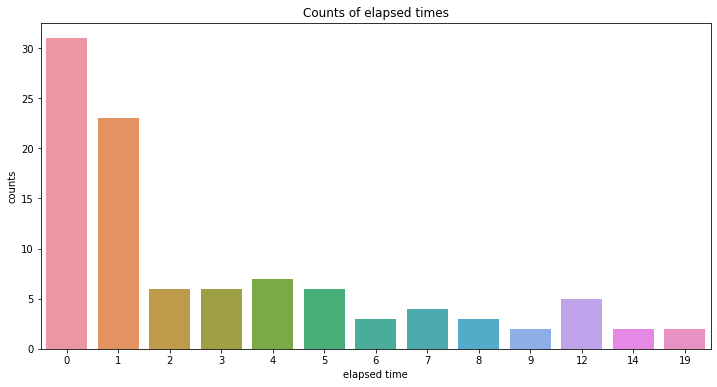

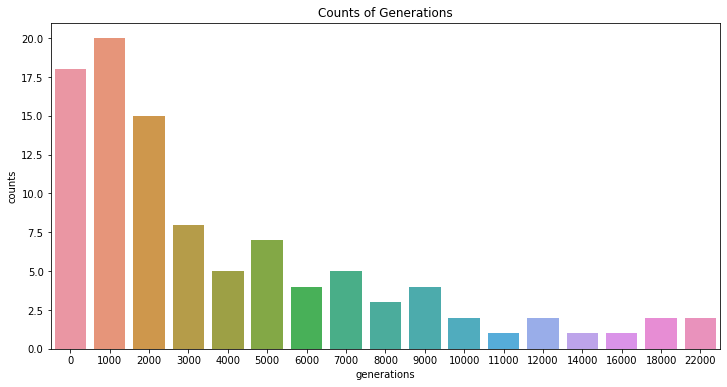

In [49]:
import os

unique_identifier = "100_25_population"
parent_directory = "C:\\Users\\SAB68\\repos\\samsambutdifferent\\eight-queen-problem\\results\\optimise-crossover"

path = os.path.join(parent_directory, unique_identifier)

if not os.path.exists(path):
    os.mkdir(path)

config = {
    "NUMBER_OF_QUEENS": NUMBER_OF_QUEENS,
    "SIZE_OF_POPULATION": SIZE_OF_POPULATION,
    "MUTATION_FREQUENCY": MUTATION_FREQUENCY,
    "PERFECT_SCORE": PERFECT_SCORE,
    "test_file": test_populations_name
}

f = open(path + "\\config", "w")

for item in config.items():
    f.writelines(str(item) + '\n')
f.close()


import pandas as pd

results_df = pd.DataFrame(results)

mean_number_of_generations = results_df["number_of_generations"].mean()
mean_elapsed_time = results_df["elapsed_time"].mean()

std_number_of_generations = results_df["number_of_generations"].std()
std_elapsed_time = results_df["elapsed_time"].std()

print(results_df)

print(f"mean_number_of_generations: {mean_number_of_generations}")
print(f"std_number_of_generations: {std_number_of_generations}")
print(f"mean_elapsed_time: {mean_elapsed_time}")
print(f"std_elapsed_time: {std_elapsed_time}")


f = open(path + "\\metrics", "w")
f.writelines(f"mean_number_of_generations: {mean_number_of_generations}" + '\n')
f.writelines(f"std_number_of_generations: {std_number_of_generations}" + '\n')
f.writelines(f"mean_elapsed_time: {mean_elapsed_time}" + '\n')
f.writelines(f"std_elapsed_time: {std_elapsed_time}" + '\n')
f.writelines('\n')
f.write(str(results_df))
f.close()


# check all results finish
over_30_seconds = results_df[results_df["elapsed_time"] > 30]
f = open(path + "\\over_30_seconds", "w")
f.write(str(over_30_seconds))
f.close()
print("over_30_seconds")
print(over_30_seconds)


import math

def round_down_to_1000(x):
    return round(x, -3) 


floored_elapsed_time = results_df["elapsed_time"].apply(math.floor)
floored_number_of_generations = results_df["number_of_generations"].apply(round_down_to_1000)

frame = { 'elapsed_time': floored_elapsed_time, 'number_of_generations': floored_number_of_generations }

floored_results_df = pd.DataFrame(frame)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

fig = sns.barplot(x=floored_results_df.elapsed_time.value_counts().index, y=floored_results_df.elapsed_time.value_counts())

plt.xlabel("elapsed time")
plt.ylabel("counts")
plt.title("Counts of elapsed times")
plt.savefig(path + '/counts_of_elapsed_time.png')
plt.show(fig)

plt.figure(figsize=(12,6))

fig = sns.barplot(x=floored_results_df.number_of_generations.value_counts().index, y=floored_results_df.number_of_generations.value_counts())

plt.xlabel("generations")
plt.ylabel("counts")
plt.title("Counts of Generations")
plt.savefig(path + '/counts_of_generations.png')
plt.show(fig)
